# BINGO-Hackaton
**Luciano Barosi**
*BINGO Collaboration*

## Supernovas and the Accelerating Universe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen # That is an useful package

Let's fetch the Supernova Data directly from a URL, read it line by line and construct our data

In [2]:
SN_list = []
z_array = np.array([])
mod_array = np.array([])
moderr_array = np.array([])
f = urlopen('http://supernova.lbl.gov/Union/figures/SCPUnion2_mu_vs_z.txt')
for line in f:
    pieces = line.decode('utf8').split('\n')
    # Header of data is commentd out, we do not need this
    # Data format is SN name, redshift, distance modulos, error 
    if '#' in pieces[0]: continue
    SN, z, mod, moderr = line.split()
    SN_list.append(SN)
    z_array = np.append(z_array,np.float64(z))
    mod_array = np.append(mod_array,np.float64(mod))
    moderr_array = np.append(moderr_array,np.float64(moderr))
#Always close you IO channels.
f.close()

Let's plot the data

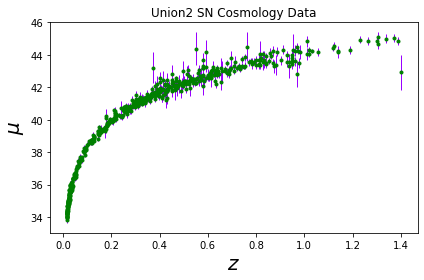

In [3]:
fig = plt.figure()
plt.errorbar(z_array, mod_array, yerr=moderr_array, fmt='.', capsize=0,
    elinewidth=1.0, ecolor=(0.6,0.0,1.0), color='green' )
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$\mu$', fontsize=20)
plt.title("Union2 SN Cosmology Data")
plt.tight_layout()

### Distance Modulus and Magnitude
$$\mu = m - M $$ 
$$\mu = 5 (\mathrm{Log}_{10}(d) - 1)$$
**Distances are measured in parsec**

**Absolute magnitude: 10 pc**
Let's show the plot with distances.

In [4]:
def distance_Mpc(m,z):
    return 0.00001 * (10**(m/5)) / (1.0 + z)
d_array = distance_Mpc(mod_array,z_array)
#We need to calculate the errorbars for distances
d_error_plus  = ( distance_Mpc((mod_array+moderr_array),z_array) - d_array )
d_error_minus = ( d_array - distance_Mpc((mod_array-moderr_array),z_array) )

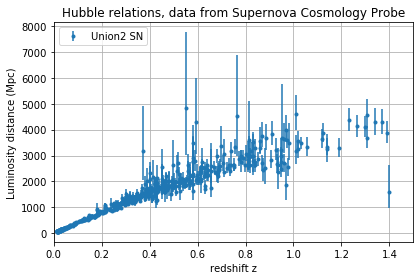

In [5]:
dlabel = 'Union2 SN'
plt.figure()
plt.errorbar(z_array,d_array, yerr=(d_error_minus,d_error_plus),fmt='.',label=dlabel)
plt.xlim([0,1.5])
plt.xlabel('redshift z')
plt.ylabel('Luminosity distance (Mpc)')
plt.grid(b=True,which='both')
plt.legend(loc='upper left')
plt.title('Hubble relations, data from Supernova Cosmology Probe')
plt.tight_layout()

$$ds^2 = -dt^2 + a²(t)\left[dr^2 + r^2d\Omega^2 \right] $$

where we assumed the universe spatially flat.
Plug this in the Einstein equation:

$$ R_{\mu\nu}-\frac{1}{2}g_{\mu\nu}R = 8\pi GT_{\mu\nu}$$

and consider the universe to be filled by componentes such that

$$T_{\mu\nu}= \rho u_\mu u_\nu + P (g_{\mu\nu} + u_\mu u_\nu) $$

with the four-velocity given by 

$$u^\mu = (1,0,0,0)$$

You will find the Hubble ,the acceleration and the continuity equation:

$$ H^2 =\frac{8 \pi G}{3}\rho$$
$$\dot \rho + 3 H (\rho + P) = 0$$
$$\frac{\ddot a}{a} = -\frac{-4\pi G}{3}(\rho + 3P)$$

Definindo a densidade crítica do universo

$$\rho_c = \frac{3 {H_0}^2}{8\pi G}$$

$$ \frac{H^2}{{H_0}^2} =  \Omega_\Lambda + \Omega_M $$

A distância comóvel pode ser lida do elemento de linha (recolocando fatores de c):

$$\chi = \int_{t_em}^{t_0} \frac{c dt}{a(t)} = \int_a^1 \frac{c da}{H a^2} $$

A distância de luminosidade deve levar em conta a maneira como a radiação se propaga no espaço e a perda de energia da luz devido ao redshift:

$$ d_L = (1+z)\chi$$

Usando a equação de Friedman podemos escrever expressões integrais para estas distâncias e podemos mudar a variável para z na integração.
$$d_L = (1+z) \frac{c}{H_0} \int_0^z \frac{dz}{\sqrt{\Omega_M (1+z)^3 + \Omega_\Lambda}}$$

Since we are considering a spatially flat universe, there is a constrain:
$$\Omega_\Lambda + \Omega_M = 1$$

And we have a two parameter model to fit our data.

For low z we may expand:

$$ {d_L}^{(1)} = \frac{c z}{H_0} $$
$$ {d_L}^{(2)} = \frac{c z}{H_0} \left( 1 + \frac{1-q_0}{2} z \right)$$

The term $c z$ is the recession speed and the result above represents Hubble Law as originally imagined.

$$q_0 = \frac{1}{2}\Omega_M + \Omega_\Lambda = \frac{3}{2}\Omega_M -1 $$

Finally we may replot the previous graph in terms of distances and velocities:

In [6]:
from scipy.constants import c
print("The speed of light=",c)
v_array = c*z_array/1000

The speed of light= 299792458.0


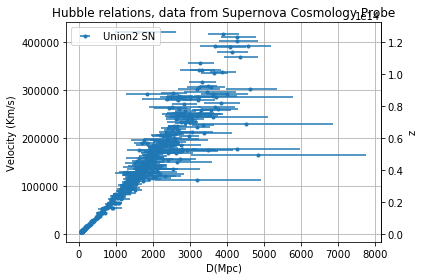

In [7]:
dlabel = 'Union2 SN'
fig, ax =  plt.subplots()
ax.errorbar(d_array,v_array, xerr=(d_error_minus,d_error_plus),fmt='.',label=dlabel)
ax.set_xlabel('D(Mpc)')
ax.set_ylabel('Velocity (Km/s)')
ax.grid(b=True,which='both')
ax.legend(loc='upper left')
ax.set_title('Hubble relations, data from Supernova Cosmology Probe')
sec = ax.secondary_yaxis('right', functions=(lambda x: c*x, lambda x: x/c))
sec.set_ylabel('z')
plt.tight_layout()

In [8]:
#Hubble Law
def d1(z,H0,m):
    return (1/1000)*c*z/H0+m

#Deceleration Parameter
def d2(z,H0,q):
    return (1/1000)*(c*z/H0)*(1-(1+q)*z/2)



#Chi-square reduced to evaluate the goodness of fir
def chi2_r(ydata,yfit,dof,sigma):
    chisq = np.sum((ydata-yfit/sigma)**2)
    nu = ydata.size-1-dof
    return chisq/nu        

In [9]:
def plotSupernova(LABEL):
    dlabel = 'Union2 SN'
    fig, ax = plt.subplots()
    ax.errorbar(zfilter,dfilter, yerr=sig, fmt='.',label=dlabel)
    ax.plot(zaxis,fitd, label=LABEL)
    ax.fill_between(zaxis, fitd_up, fitd_down, alpha=.25, color='red', label="99.7 confidence interval")
    ax.set_xlabel('redshift z')
    ax.set_ylabel('distance (Mpc)')
    ax.grid(b=True,which='both')
    ax.legend(loc='upper left')
    ax.set_title('Hubble relations, data from Supernova Cosmology Probe')
    plt.tight_layout()
    return

In [10]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare
confidence = 3
zmax = 0.5
indx = np.where(z_array < zmax)
zfilter = z_array[indx]
dfilter = d_array[indx]
sig = d_error_plus[indx] - d_error_minus[indx]
popt, pcov = curve_fit(d1, zfilter, dfilter, sigma = sig)
    
perr = np.sqrt(np.diag(pcov))
popt_up = popt+confidence*perr
popt_down = popt-confidence*perr

chi2r = chi2_r(dfilter,d1(zfilter,*popt1),len(popt),sig)
print("Hubble Constant H=",popt[0], "Intercept Parameter q=", popt[1])
print("Chi-quadrado = ",chi2r)
#z points to plot smooth fit
zaxis = np.linspace(0,zmax,200)
fitd = d1(zaxis,*popt)
fitd_up = d1(zaxis,*popt_up)
fitd_down = d1(zaxis,*popt_down)
plotSupernova("Hubble Linear")

NameError: name 'popt1' is not defined

In [ ]:
confidence = 3
zmax = 0.5
indx = np.where(z_array < zmax)
zfilter = z_array[indx]
dfilter = d_array[indx]
sig = d_error_plus[indx] - d_error_minus[indx]
popt, pcov = curve_fit(d2, zfilter, dfilter, sigma = sig)
    
perr = np.sqrt(np.diag(pcov))
popt_up = popt+confidence*perr
popt_down = popt-confidence*perr

chi2r = chi2_r(dfilter,d2(zfilter,*popt1),len(popt),sig)
print("Hubble Constant H=",popt[0], "Deceleration Parameter q=", popt[1])
print("Chi-quadrado = ",chi2r)
#z points to plot smooth fit
zaxis = np.linspace(0,zmax,200)
fitd = d2(zaxis,*popt)
fitd_up = d2(zaxis,*popt_up)
fitd_down = d2(zaxis,*popt_down)
plotSupernova("Hubble Linear")


In [ ]:

zmax = 1.5
indx = np.where(z_array < zmax)
zfilter = z_array[indx]
dfilter = d_array[indx]
sig = d_error_plus[indx] - d_error_minus[indx]
popt, pcov = curve_fit(d2, zfilter, dfilter, sigma = sig)
    
perr = np.sqrt(np.diag(pcov))
popt_up = popt+confidence*perr
popt_down = popt-confidence*perr

chi2r = chi2_r(dfilter,d2(zfilter,*popt1),len(popt),sig)
print("Hubble Constant H=",popt[0], "Deceleration Parameter q=", popt[1])
print("Chi-quadrado = ",chi2r)
#z points to plot smooth fit
zaxis = np.linspace(0,zmax,200)
fitd = d2(zaxis,*popt)
fitd_up = d2(zaxis,*popt_up)
fitd_down = d2(zaxis,*popt_down)
plotSupernova("Hubble Linear")

# How to fit d_FRW?

$$d_L = (1+z) \frac{c}{H_0} \int_0^z \frac{dz}{\sqrt{\Omega_M (1+z)^3 + \Omega_\Lambda}}$$

Let's suppose for the moment that we already know the value of the Hubble Constant, we will approximate the above function by a cumulative sum and calculate de $\chi^2$ iteratively for $\Omega_M$ from 0 to 1. Doing this we see the minimization procedure gives a number in the expected range.

If we have several parameters, this procedure starts to increase complexity and may run in all sort of problems, one of them is computing time, but there are also problems with convergence, multiple minima... 

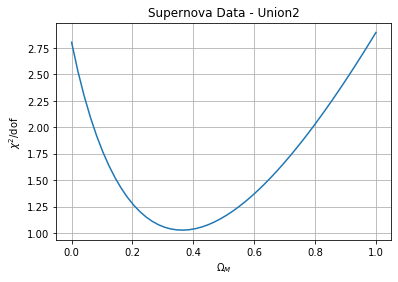

In [25]:
######################################################
# here we crudely estimate the best-fit value of OmM,
# assuming OmL = 1-OmM, and OmK = 0 (flat universe).
H0 = 68.
dz = 0.001
zz = np.arange(dz,2.0,dz)
OmMs = np.linspace(0.,1.,50)

#Iterating to calculate chi-square
ch = np.zeros(OmMs.size)
for I in np.arange(OmMs.size):
    OmM = OmMs[I]
    OmL = 1.-OmM
    #FRW distance
    ds = 0.001*c/H0*np.cumsum(1./np.sqrt(OmM*(1+zz)**3+OmL))*dz*(1.+zz)
    #This is being done with the original distance modulus data
    ms = (np.log10(ds)+5.)*5.
    mp = np.interp(z_array,zz,ms)
    ch[I] = np.sum( ((mod_array-mp)/moderr_array)**2 ) / mod_array.size

plt.figure()
plt.plot(OmMs,ch)
# we can use LaTeX to get greek letters:
plt.xlabel(r'$\Omega_M$')
plt.ylabel(r'$\chi^2$/dof')
plt.title('Supernova Data - Union2')
plt.grid()
plt.show()

In [24]:
#That is a bizarre line to pick the minimum value for chi2
#then we find the index of this value with is.close, remember
#numpy is tricke with floating equality.
#At the end of the day, tcompute Omega_m for this index.
OmMs[np.isclose(ch,np.min(ch)).nonzero()[0][0]]

0.36734693877551017

We live in an accelerating universe filled with something like 64% of Dark Energy. We now move to bayes analysis.